<a href="https://colab.research.google.com/github/nikukaushik001/Machine-Learning-Projects/blob/main/ImageClassificationProjectUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification On Dogs and Cats Datasets**

In [1]:
# Step 1: Upload kaggle.json file
from google.colab import files
files.upload()  # Upload the kaggle.json file here

# Step 2: Move and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:08<00:00, 313MB/s]
100% 1.06G/1.06G [00:08<00:00, 134MB/s]


In [3]:
import zipfile

with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall("dogs_vs_cats")
    zip_ref.close()

# **Import Relevant Library**

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import cv2

array([[[  8,   8,  20],
        [  8,   8,  20],
        [  7,   7,  19],
        ...,
        [ 13,  15,  23],
        [ 13,  15,  23],
        [ 13,  15,  23]],

       [[  9,   9,  21],
        [  9,   9,  21],
        [  8,   8,  20],
        ...,
        [ 11,  13,  21],
        [ 11,  13,  21],
        [ 11,  13,  21]],

       [[ 11,  12,  22],
        [ 11,  12,  22],
        [ 10,  11,  21],
        ...,
        [  9,  11,  19],
        [  9,  11,  19],
        [  9,  11,  19]],

       ...,

       [[ 97, 119, 131],
        [ 97, 121, 133],
        [ 99, 122, 137],
        ...,
        [ 53,  69, 116],
        [ 54,  70, 117],
        [ 55,  71, 118]],

       [[ 91, 110, 123],
        [ 91, 113, 125],
        [ 93, 115, 127],
        ...,
        [ 55,  69, 117],
        [ 55,  71, 117],
        [ 57,  71, 119]],

       [[ 87, 103, 119],
        [ 86, 105, 120],
        [ 88, 107, 122],
        ...,
        [ 57,  70, 116],
        [ 56,  72, 115],
        [ 59,  72, 118]]], dtype=uint8)
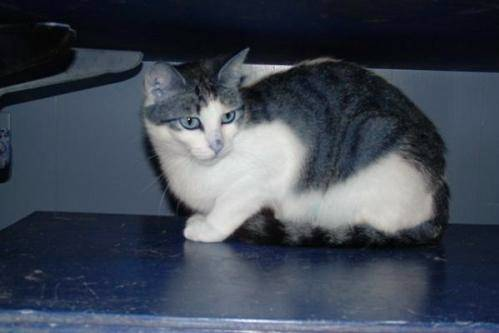

In [5]:
img = cv2.imread('/content/dogs_vs_cats/dogs_vs_cats/test/cats/cat.10531.jpg')
img

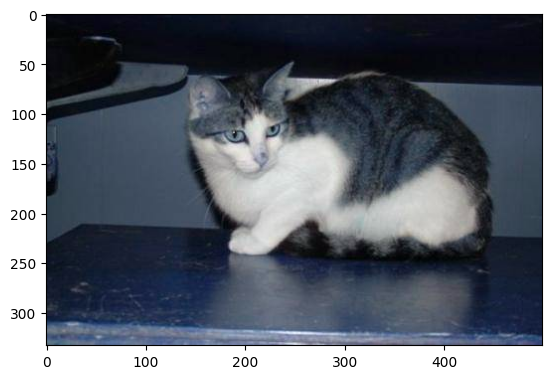

In [6]:
plt.imshow(img)

In [7]:
img.shape

(333, 499, 3)

# Generating the image for Model Training

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
print('Number Of batches:- ', 20000//32)

Number Of batches:-  625


In [10]:
0 , 255

(0, 255)

In [11]:
25/255, 128/255, 254/255

(0.09803921568627451, 0.5019607843137255, 0.996078431372549)

In [12]:
# Normalization

def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label


In [13]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

In [14]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**CNN Architecture**

In [15]:
model = Sequential()

model.add(Conv2D(32,  kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size =(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,  kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size =(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,  kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size =(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
result = model.fit(train_ds, validation_data = test_ds, epochs=10)  # train acc high test acc low is overfitting

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.5503 - loss: 0.7089 - val_accuracy: 0.7200 - val_loss: 0.5582
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7231 - loss: 0.5515 - val_accuracy: 0.7692 - val_loss: 0.4871
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.8099 - loss: 0.4114 - val_accuracy: 0.7748 - val_loss: 0.5344
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8934 - loss: 0.2497 - val_accuracy: 0.7642 - val_loss: 0.8696
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9554 - loss: 0.1230 - val_accuracy: 0.7678 - val_loss: 1.0443
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9769 - loss: 0.0679 - val_accuracy: 0.7672 - val_loss: 1.0614
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9805 - loss: 0.0571 - val_accuracy: 0.7728 - val_loss: 1.1919
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9862 - loss: 0.0407 - 

# ***Training And Validation Accuracy Graph***





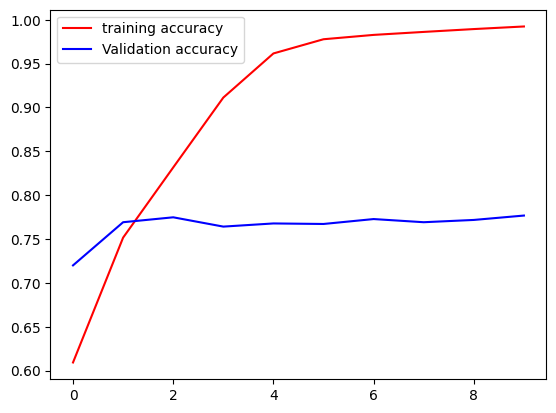

In [19]:
plt.plot(result.history['accuracy'], color='red', label='training accuracy')
plt.plot(result.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.legend()
plt.show()


# ***Training And Validation Loss Graph***





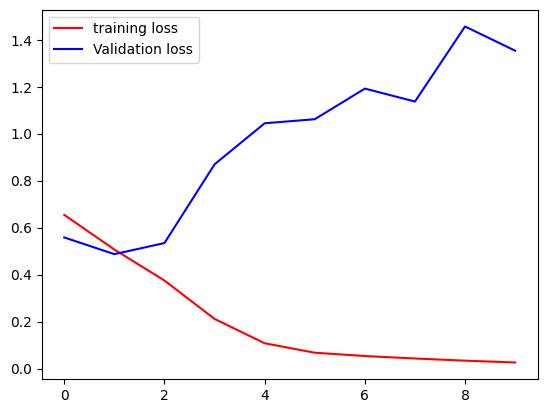

In [20]:
plt.plot(result.history['loss'], color='red', label='training loss')
plt.plot(result.history['val_loss'], color='blue', label='Validation loss')
plt.legend()
plt.show()


# **Ways to improve model performance and prevent overfitting**

- Add More data
- Data Augmentation (Capture image from every angle)
- L1 / L2 Regularization
- Batch Normalization
- DropOut Layer (specific for overfit)

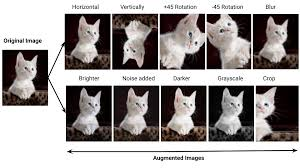

In [21]:
from keras.layers import BatchNormalization, Dropout

In [22]:
model = Sequential()

model.add(Conv2D(32,  kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides=2, padding='valid'))


model.add(Conv2D(64,  kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,  kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
result = model.fit(train_ds, validation_data = test_ds, epochs=10)  # train acc high test acc low is overfitting

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 89ms/step - accuracy: 0.5732 - loss: 1.9807 - val_accuracy: 0.6006 - val_loss: 0.7883
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.6556 - loss: 0.6302 - val_accuracy: 0.7108 - val_loss: 0.5539
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.7523 - loss: 0.5007 - val_accuracy: 0.7350 - val_loss: 0.5056
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7955 - loss: 0.4455 - val_accuracy: 0.7838 - val_loss: 0.4620
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8245 - loss: 0.3938 - val_accuracy: 0.7960 - val_loss: 0.4328
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8551 - loss: 0.3194 - val_accuracy: 0.8028 - val_loss: 0.4614
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.8991 - loss: 0.2367 - val_accuracy: 0.8030 - val_loss: 0.6337
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.9315 - loss: 0.1688 - 

# ***Training And Validation Accuracy Graph***

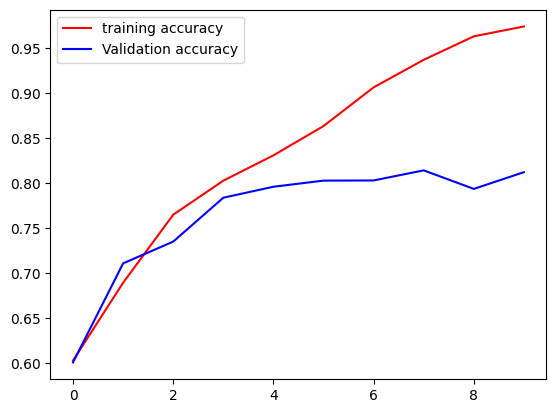

In [26]:
plt.plot(result.history['accuracy'], color='red', label='training accuracy')
plt.plot(result.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.legend()
plt.show()


# ***Training And Validation Loss Graph***

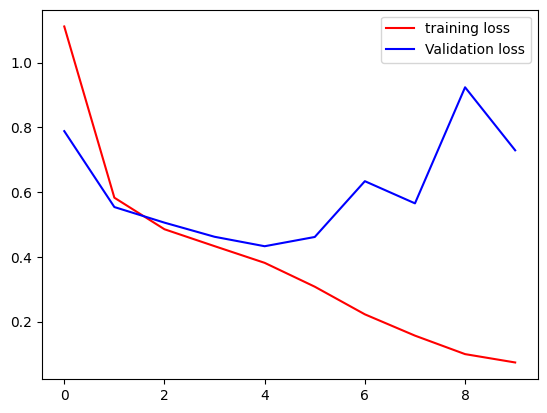

In [27]:
plt.plot(result.history['loss'], color='red', label='training loss')
plt.plot(result.history['val_loss'], color='blue', label='Validation loss')
plt.legend()
plt.show()


## Model Testing


array([[[102,  90,  84],
        [102,  90,  84],
        [102,  90,  84],
        ...,
        [ 18,  12,  13],
        [ 18,  12,  13],
        [ 18,  12,  13]],

       [[103,  91,  85],
        [106,  94,  88],
        [107,  95,  89],
        ...,
        [ 18,  12,  13],
        [ 18,  12,  13],
        [ 18,  12,  13]],

       [[109,  97,  91],
        [114, 102,  96],
        [117, 105,  99],
        ...,
        [ 18,  12,  13],
        [ 18,  12,  13],
        [ 18,  12,  13]],

       ...,

       [[ 29,  11,   4],
        [ 29,  11,   4],
        [ 29,  11,   4],
        ...,
        [106,  98, 105],
        [108,  98, 104],
        [107,  97, 103]],

       [[ 29,  11,   4],
        [ 29,  11,   4],
        [ 29,  11,   4],
        ...,
        [106,  98, 108],
        [106,  98, 105],
        [106,  98, 105]],

       [[ 29,  11,   4],
        [ 29,  11,   4],
        [ 29,  11,   4],
        ...,
        [100,  92, 103],
        [100,  92, 102],
        [100,  92, 102]]], dtype=uint8)
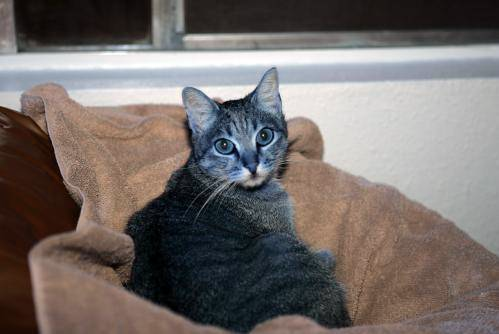

In [28]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10489.jpg')
test_img

In [29]:
test_img.shape

(334, 499, 3)

In [30]:
test_img = cv2.resize(test_img, (256, 256))

In [31]:
test_img.shape

(256, 256, 3)

In [34]:
test_input = test_img.reshape(1, 256, 256, 3)

In [36]:
# test_input

In [37]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [39]:
model.predict(test_input)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


np.float32(1.0)

In [41]:
output = model.predict(test_input)[0][0]

if output <= 0.5 :
  print("This is a dog")
else:
  print("This is a cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This is a cat


## Final Function

In [60]:
def image_classifier(img_path):

  test_img = cv2.imread(img_path)
  print(f'Before Resize: {test_img.shape}')
  test_img = cv2.resize(test_img, (256, 256))
  print(f'After Resize: {test_img.shape}')
  print('\n')


  test_input = test_img.reshape(1, 256, 256, 3)
  output = model.predict(test_input)[0][0]

  if output <= 0.5 :
    print("This is a dog")
  else:
    print("This is a cat")
    print('\n')


    plt.imshow(test_img)

Before Resize: (334, 499, 3)
After Resize: (256, 256, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This is a cat




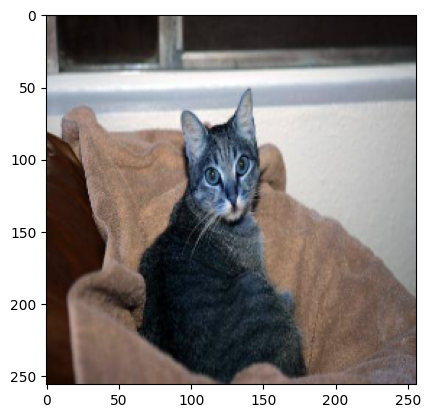

In [61]:
image_classifier('/content/dogs_vs_cats/test/cats/cat.10489.jpg')

In [62]:
image_classifier('/content/dogs_vs_cats/test/dogs/dog.10372.jpg')

Before Resize: (299, 250, 3)
After Resize: (256, 256, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This is a dog
